## Step1. 데이터 탐색 (EDA : Exploratory Data Analysis)

#### Importing data using Pandas

In [94]:
import pandas as pd 

In [95]:
# 한글 폰트가 깨지는 문제 해결용
from matplotlib.pyplot import rc
rc('font',family='New Gulim')

In [96]:
# 윈도우 환경에서 파일을 그대로 읽으면 유니코드 에러 발생, encoding을 CP949로 강제 지정해준다
data = pd.read_csv('Input/dfe_mct_dat_set_edit_sample.csv',encoding='CP949')
## data = pd.read_csv('../Input/creditcard.csv',header=None)

In [97]:
print("고려대 인근 카드 이용고객 내역 -  rows:",data.shape[0]," columns:", data.shape[1])

고려대 인근 카드 이용고객 내역 -  rows: 32100  columns: 13


In [98]:
data.head()

,CLNN,CLN_AGE,SEX_CCD,MCT_N,MCT_RY_CD,MCT_RY_NM,LAL_MCT_XC_VL,LAL_MCT_YC_VL,APV_TS_D,APV_TS_DL_TM,CRD_TCD,NS_MS_CN,SAA
0,AA301810473,47,M,MM338736705,811000,종합병원,127.027019,37.587212,20171010,131835,0,0,400
1,AA301810473,47,M,MM270435483,215000,편의점,127.027019,37.587212,20171024,143102,0,0,700
2,AA301810473,47,M,MM338736705,811000,종합병원,127.027019,37.587212,20171010,122455,0,0,900
3,AA301810473,47,M,MM338736705,811000,종합병원,127.027019,37.587212,20171025,151038,0,0,900
4,AA301810473,47,M,MM338736705,811000,종합병원,127.027019,37.587212,20171025,151732,0,0,1000


In [99]:
data.keys()

Index(['CLNN', 'CLN_AGE', 'SEX_CCD', 'MCT_N', 'MCT_RY_CD', 'MCT_RY_NM',
       'LAL_MCT_XC_VL', 'LAL_MCT_YC_VL', 'APV_TS_D', 'APV_TS_DL_TM', 'CRD_TCD',
       'NS_MS_CN', 'SAA'],
      dtype='object')

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32100 entries, 0 to 32099
Data columns (total 13 columns):
CLNN             32100 non-null object
CLN_AGE          32100 non-null int64
SEX_CCD          32100 non-null object
MCT_N            32100 non-null object
MCT_RY_CD        32100 non-null int64
MCT_RY_NM        32100 non-null object
LAL_MCT_XC_VL    32100 non-null float64
LAL_MCT_YC_VL    32100 non-null float64
APV_TS_D         32100 non-null int64
APV_TS_DL_TM     32100 non-null int64
CRD_TCD          32100 non-null int64
NS_MS_CN         32100 non-null int64
SAA              32100 non-null int64
dtypes: float64(2), int64(7), object(4)
memory usage: 3.2+ MB


#### Looking at the percentage of missing values per column

In [101]:
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().sum()/217607)*100})
missing_data

,total_missing,perc_missing
CLNN,0,0.0
CLN_AGE,0,0.0
SEX_CCD,0,0.0
MCT_N,0,0.0
MCT_RY_CD,0,0.0
MCT_RY_NM,0,0.0
LAL_MCT_XC_VL,0,0.0
LAL_MCT_YC_VL,0,0.0
APV_TS_D,0,0.0
APV_TS_DL_TM,0,0.0


#### missing data는 없는 것으로 확인됨

### 데이터 전처리 (preprocessing)

#### - 승인일시와 승인시각을 합쳐서 datetime format으로 저장

In [102]:
# data_clean : 전처리하여 저장할 데이터
data_clean=data

In [103]:
## int type의 승인일자 데이터 포맷을 string으로 변경
data_clean['APV_TS_D']=data_clean['APV_TS_D'].astype(str)
# data_clean['APV_TS_D']=pd.to_datetime(data_clean['APV_TS_D'], format='%Y%m%d')

In [104]:
# int type으로 잘못 저장된 승인일시를 string으로 변경하고, 앞에 0을 채움
data_clean['APV_TS_DL_TM']=data_clean['APV_TS_DL_TM'].astype(str).str.zfill(6)

In [105]:
# 전처리된 새 dataframe을 추가
data_clean['APV_TS_DATETIME']= pd.to_datetime(data_clean['APV_TS_D'] + ' ' + data_clean['APV_TS_DL_TM'], format='%Y%m%d %H:%M:%S')

In [106]:
# data_clean['APV_DATETIME']

In [107]:
data_clean.head()

,CLNN,CLN_AGE,SEX_CCD,MCT_N,MCT_RY_CD,MCT_RY_NM,LAL_MCT_XC_VL,LAL_MCT_YC_VL,APV_TS_D,APV_TS_DL_TM,CRD_TCD,NS_MS_CN,SAA,APV_TS_DATETIME
0,AA301810473,47,M,MM338736705,811000,종합병원,127.027019,37.587212,20171010,131835,0,0,400,2017-10-10 13:18:35
1,AA301810473,47,M,MM270435483,215000,편의점,127.027019,37.587212,20171024,143102,0,0,700,2017-10-24 14:31:02
2,AA301810473,47,M,MM338736705,811000,종합병원,127.027019,37.587212,20171010,122455,0,0,900,2017-10-10 12:24:55
3,AA301810473,47,M,MM338736705,811000,종합병원,127.027019,37.587212,20171025,151038,0,0,900,2017-10-25 15:10:38
4,AA301810473,47,M,MM338736705,811000,종합병원,127.027019,37.587212,20171025,151732,0,0,1000,2017-10-25 15:17:32


In [108]:
def clean(x):
    x = x.replace("F", "1").replace("M", "0")
    return float(x)

In [109]:
# 데이터 전처리 
data_clean['SEX_CCD'] = data_clean['SEX_CCD'].apply(clean)

In [110]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32100 entries, 0 to 32099
Data columns (total 14 columns):
CLNN               32100 non-null object
CLN_AGE            32100 non-null int64
SEX_CCD            32100 non-null float64
MCT_N              32100 non-null object
MCT_RY_CD          32100 non-null int64
MCT_RY_NM          32100 non-null object
LAL_MCT_XC_VL      32100 non-null float64
LAL_MCT_YC_VL      32100 non-null float64
APV_TS_D           32100 non-null object
APV_TS_DL_TM       32100 non-null object
CRD_TCD            32100 non-null int64
NS_MS_CN           32100 non-null int64
SAA                32100 non-null int64
APV_TS_DATETIME    32100 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(5), object(5)
memory usage: 3.4+ MB


In [111]:
data_clean.describe()

,CLN_AGE,SEX_CCD,MCT_RY_CD,LAL_MCT_XC_VL,LAL_MCT_YC_VL,CRD_TCD,NS_MS_CN,SAA
count,32100.000000,32100.000000,32100.000000,32100.000000,32100.000000,32100.000000,32100.000000,3.210000e+04
mean,28.716636,0.274112,326092.024922,127.030235,37.586448,0.806231,0.000436,5.889736e+03
std,11.459273,0.446073,156850.812935,0.001824,0.001977,0.395257,0.035298,1.324768e+04
min,18.000000,0.000000,115000.000000,127.023601,37.582073,0.000000,0.000000,-1.100000e+05
25%,22.000000,0.000000,215000.000000,127.029222,37.584869,1.000000,0.000000,2.000000e+03
50%,24.000000,0.000000,311000.000000,127.029689,37.586761,1.000000,0.000000,4.100000e+03
75%,28.000000,1.000000,331000.000000,127.032571,37.588672,1.000000,0.000000,6.500000e+03
max,64.000000,1.000000,952000.000000,127.034663,37.589654,1.000000,3.000000,1.457050e+06


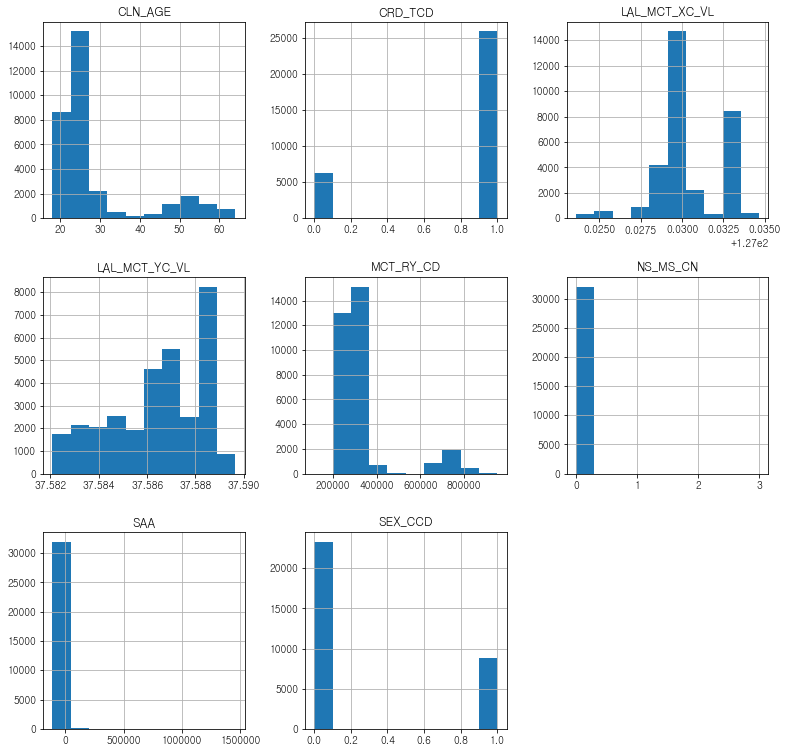

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Feature별 histogram
data_clean.hist(figsize = (13,13))
plt.show()

#### - 히스토그램 결과에서 취급액(SAA)에 minus 값 존재, minus인 값 삭제(전처리)

In [113]:
data_clean = data_clean.loc[data_clean['SAA'] > 0]

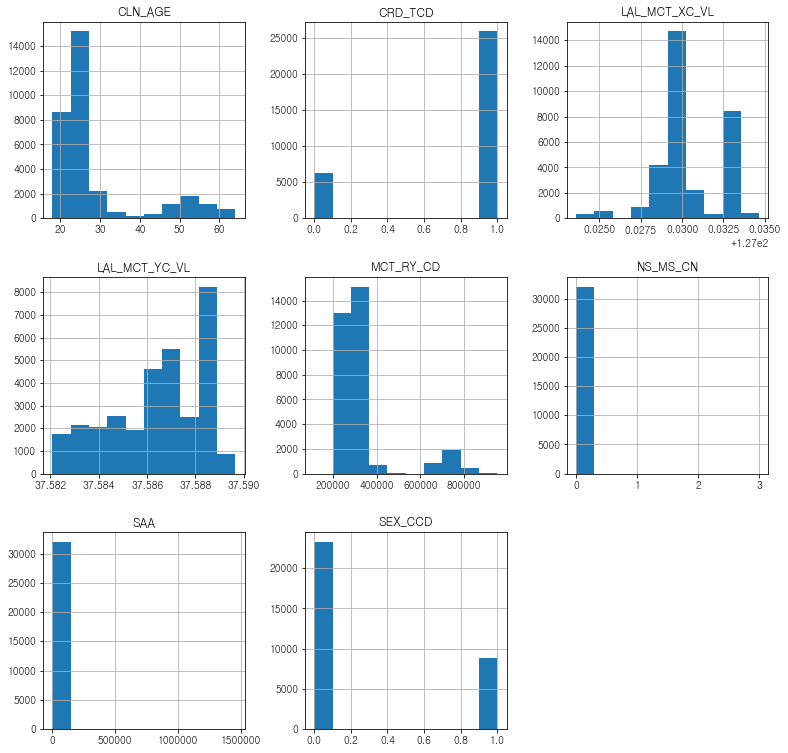

In [114]:
data_clean.hist(figsize = (13,13))
plt.show()

#### 금액(SAA) 항목이 모두 >=0인 것을 확인함

In [115]:
data_clean.head()

,CLNN,CLN_AGE,SEX_CCD,MCT_N,MCT_RY_CD,MCT_RY_NM,LAL_MCT_XC_VL,LAL_MCT_YC_VL,APV_TS_D,APV_TS_DL_TM,CRD_TCD,NS_MS_CN,SAA,APV_TS_DATETIME
0,AA301810473,47,0.0,MM338736705,811000,종합병원,127.027019,37.587212,20171010,131835,0,0,400,2017-10-10 13:18:35
1,AA301810473,47,0.0,MM270435483,215000,편의점,127.027019,37.587212,20171024,143102,0,0,700,2017-10-24 14:31:02
2,AA301810473,47,0.0,MM338736705,811000,종합병원,127.027019,37.587212,20171010,122455,0,0,900,2017-10-10 12:24:55
3,AA301810473,47,0.0,MM338736705,811000,종합병원,127.027019,37.587212,20171025,151038,0,0,900,2017-10-25 15:10:38
4,AA301810473,47,0.0,MM338736705,811000,종합병원,127.027019,37.587212,20171025,151732,0,0,1000,2017-10-25 15:17:32


In [116]:
data_mct_ry_sex_count = data_clean.groupby(by = ['MCT_RY_NM','SEX_CCD'], as_index=False)['CLNN'].count()
data_mct_ry_sex_count

,MCT_RY_NM,SEX_CCD,CLNN
0,PC게임방,0.0,1514
1,PC게임방,1.0,78
2,가전가전용품,0.0,5
3,가전가전용품,1.0,2
4,각종 수리점,0.0,185
5,각종 수리점,1.0,6
6,개인병원,0.0,66
7,개인병원,1.0,21
8,건설건축 자재,0.0,3
9,관광민예선물용품,0.0,1


### (1) 연령별 분포 - 히스토그램과 밀도 그래프로 표현

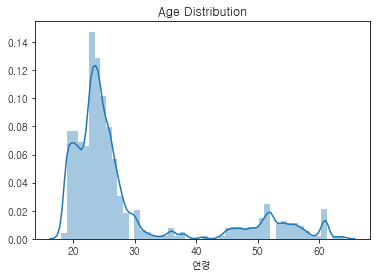

count    32098.000000
mean        28.715932
std         11.458085
min         18.000000
25%         22.000000
50%         24.000000
75%         28.000000
max         64.000000
Name: CLN_AGE, dtype: float64

In [117]:
# 연령별 분포
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(data_clean['CLN_AGE'])
plt.xlabel("연령")
plt.title("Age Distribution") 
plt.show()
data_clean['CLN_AGE'].describe()

#### 이용자의 대부분이 20대에 분포되어 있으며, 평균 연령은 33세이다

### (2) 일자별 분포

In [118]:
data_clean['APV_TS_DATETIME'].dt.day.values

array([10, 24, 10, ..., 16, 21, 10], dtype=int64)

C:\Users\JY\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


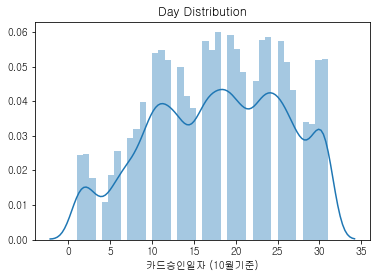

In [119]:
# 일자별 분포를 보기 위해 데이터에 일자 apv_day 추가 
data_clean['APV_DAY'] = data_clean['APV_TS_DATETIME'].dt.day

sns.distplot(data_clean['APV_DAY'])
plt.xlabel("카드승인일자 (10월기준)")
plt.title("Day Distribution") # You can comment this line out if you don't need title
plt.show()

#### 일자별 분포를 봤을 때 월 초에는 거래량이 적은데, 이는 2017년 10월 첫째주가 추석 연휴였기 때문으로 추정됨

### (3) 요일별 분포

In [120]:
data_clean['APV_WEEK'] = data_clean['APV_TS_DATETIME'].dt.day_name()

C:\Users\JY\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


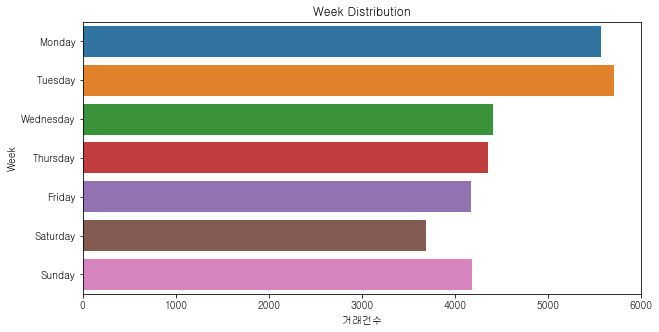

In [121]:
# 요일별 분포

week_count=data_clean['APV_WEEK'].value_counts()
order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.figure(figsize=(10,5))

sns.barplot(week_count.values, week_count.index, order=order)
plt.ylabel("Week")
plt.xlabel("거래건수")
plt.title("Week Distribution")
plt.show()

#### 요일별 건수를 보면 월,화에 거래가 많은 것처럼 보이는데, 10월에 다른 요일보다 월,화가 더 많기 때문에 왜곡이 발생할 수 있음. <br>하지만 토,일에 평소보다 이용이 줄어드는 것은 (왜곡에도 불구하고) 명확해보인다.

### (4) 시간대별 분포

C:\Users\JY\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


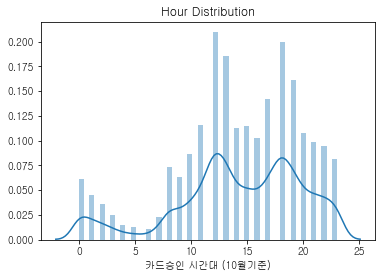

In [122]:
# 시간별 분포

# 시간대별 분포를 보기 위해 데이터에 Hour 정보 추가 
data_clean['APV_TIME'] = data_clean['APV_TS_DATETIME'].dt.hour

sns.distplot(data_clean['APV_TIME'])
plt.xlabel("카드승인 시간대 (10월기준)")
plt.title("Hour Distribution") # You can comment this line out if you don't need title
plt.show()

### (5) 성별 분포

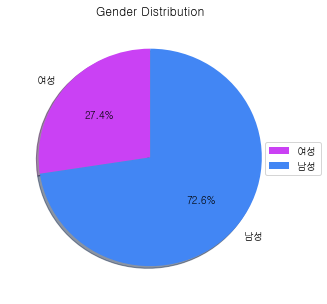

In [123]:
# 성별 분포
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
female = data_clean[data_clean['SEX_CCD']==1]['CLNN'].count()
male = data_clean[data_clean['SEX_CCD']==0]['CLNN'].count()
list = [female,male]
label = ['여성','남성']
plt.subplots(figsize=(5,5))
pie=plt.pie(list,labels=label, colors=["#CA41f4", "#4286f4"],autopct='%1.1f%%',shadow=True, startangle=90)
# plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)
plt.legend(pie[0],label, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10,bbox_transform=plt.gcf().transFigure)
plt.title("Gender Distribution")
plt.show()

#### 여성이 41%, 남성이 59%로 남성이 조금 더 많다

### (5) 가맹점 업종별 분포

####  (5)-1. 업종별 건수

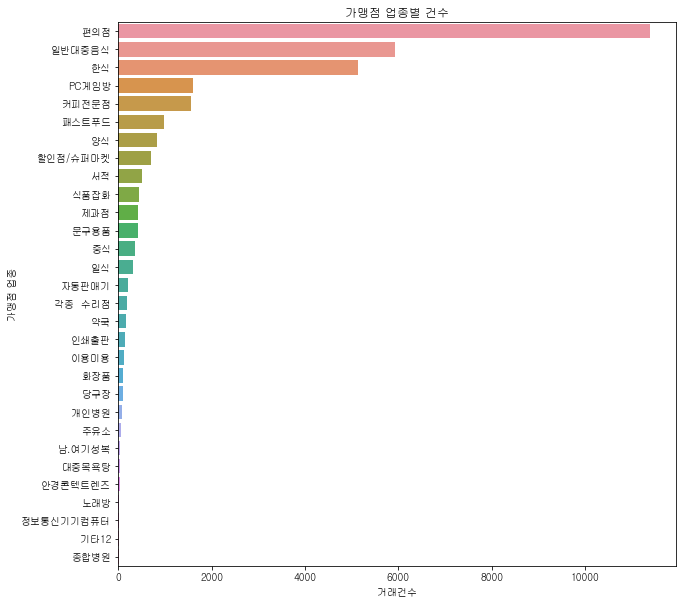

In [124]:
# 가맹점 업종별 단순 건수 그래프

# 가맹점 업종별 건수로 정렬하고 상위 30개 업종만 도출
mct_30 = data_clean['MCT_RY_NM'].value_counts()[:30].to_frame()

plt.figure(figsize=(10,10))
sns.countplot(y='MCT_RY_NM', data=data_clean, order = data_clean['MCT_RY_NM'].value_counts().iloc[:30].index)
plt.xlabel("거래건수")
plt.ylabel("가맹점 업종")
plt.title("가맹점 업종별 건수")
plt.show()

#### (5)-2. 연령별로 많이 이용한 가맹점 업종 TOP 5

In [125]:
dataage20_30 = data_clean.loc[(data_clean['CLN_AGE'] >= 20) & (data_clean['CLN_AGE'] < 30) , :]

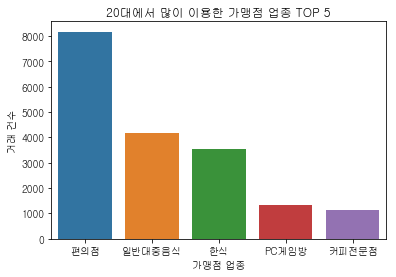

In [126]:
category = data_clean.loc[(data_clean['CLN_AGE'] >= 20) & (data_clean['CLN_AGE'] < 30) , :]['MCT_RY_NM'].value_counts()
head = category.sort_values(ascending=False).head(5)

sns.barplot(head.index, head.values)
plt.xlabel("가맹점 업종")
plt.ylabel("거래 건수")
plt.title("20대에서 많이 이용한 가맹점 업종 TOP 5")
plt.show()

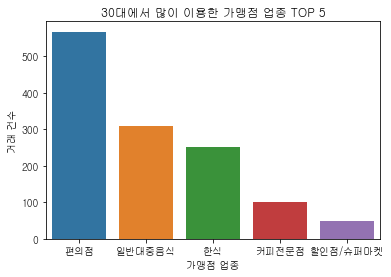

In [127]:
category = data_clean.loc[(data_clean['CLN_AGE'] >= 30) & (data_clean['CLN_AGE'] < 40) , :]['MCT_RY_NM'].value_counts()
head = category.sort_values(ascending=False).head(5)

sns.barplot(head.index, head.values)
plt.xlabel("가맹점 업종")
plt.ylabel("거래 건수")
plt.title("30대에서 많이 이용한 가맹점 업종 TOP 5")
plt.show()

#### 30대부터 top 5 업종에 종합병원이 포함되어 있음

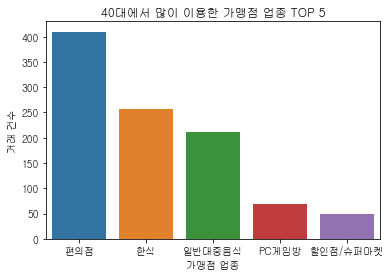

In [128]:
category = data_clean.loc[(data_clean['CLN_AGE'] >= 40) & (data_clean['CLN_AGE'] < 50) , :]['MCT_RY_NM'].value_counts()
head = category.sort_values(ascending=False).head(5)

sns.barplot(head.index, head.values)
plt.xlabel("가맹점 업종")
plt.ylabel("거래 건수")
plt.title("40대에서 많이 이용한 가맹점 업종 TOP 5")
plt.show()

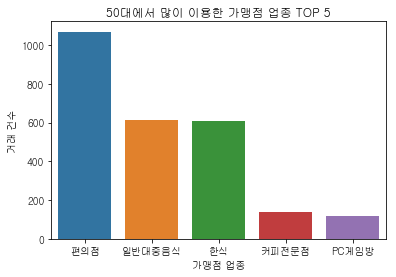

In [129]:
category = data.loc[(data['CLN_AGE'] >= 50) & (data['CLN_AGE'] < 60) , :]['MCT_RY_NM'].value_counts()
head = category.sort_values(ascending=False).head(5)

sns.barplot(head.index, head.values)
plt.xlabel("가맹점 업종")
plt.ylabel("거래 건수")
plt.title("50대에서 많이 이용한 가맹점 업종 TOP 5")
plt.show()

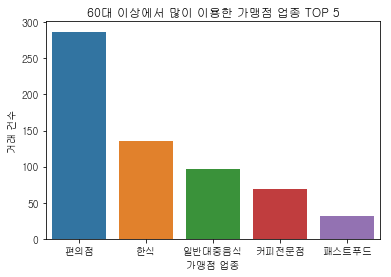

In [130]:
category = data_clean.loc[(data_clean['CLN_AGE'] >= 60), :]['MCT_RY_NM'].value_counts()
head = category.sort_values(ascending=False).head(5)

sns.barplot(head.index, head.values)
plt.xlabel("가맹점 업종")
plt.ylabel("거래 건수")
plt.title("60대 이상에서 많이 이용한 가맹점 업종 TOP 5")
plt.show()

#### 60대 이상의 경우, 종합병원 이용 건수가 현저히 높음

#### (5)-3. 특정 업종-예: 종합병원-에 대한 내역만 추출하여 확인

#### 종합병원 이용 고객의 연령별 분포

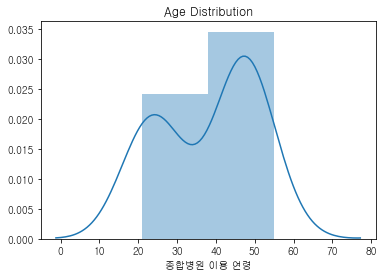

count    17.000000
mean     38.058824
std      12.305845
min      21.000000
25%      23.000000
50%      47.000000
75%      47.000000
max      55.000000
Name: CLN_AGE, dtype: float64

In [131]:
# 가맹점 업종 - 종합병원에 대해서만
datahospitol = data_clean.loc[data_clean['MCT_RY_NM'] == '종합병원', :]

# 종합병원 이용 연령별 분포
import seaborn as sns
sns.distplot(datahospitol['CLN_AGE'])
plt.xlabel("종합병원 이용 연령")
plt.title("Age Distribution")
plt.show()
datahospitol['CLN_AGE'].describe()

#### 전체 연령별 분포와 다르게, 종합병원 이용 고객의 분포는 50대를 평균으로 좌우 고르게 전 연령에 걸쳐 분포되어 있음을 알 수 있다

### (6) 연령별 이용건수 분포

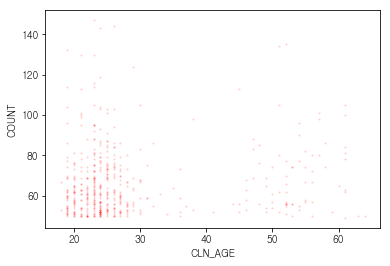

In [132]:
""" 연령별 이용건수 분포 확인 """
temp01=data_clean.groupby(["CLNN","CLN_AGE"]).size().reset_index(name="COUNT")
temp02=data_clean.groupby(["CLNN","SAA"]).size().reset_index(name="SUM")
plt.scatter(temp01["CLN_AGE"], temp01["COUNT"], c = 'red', s = 2, alpha = 0.1)
plt.xlabel("CLN_AGE")
plt.ylabel("COUNT")
plt.show()
del temp01

### (7) 연령별/업종별 취급액/이용건수 pivot

data_clean["AGE_CCD"] = data_clean["CLN_AGE"] // 10 * 10
data_clean["SAA(10K)"] = data_clean["SAA"] / 10000
""" 연령별/업종별 취급액/이용건수 pivot 생성"""
pivot_mct_ry = pd.pivot_table(data=data_clean, index = ['MCT_RY_NM'], values = ['SAA'],
columns = ['AGE_CCD'], aggfunc = [len], fill_value = 0)
pivot_mct_ry.columns = ['10대','20대','30대','40대','50대','60대','70대','80대','90대']
pivot_mct_ry_sort = pivot_mct_ry.sort_values(by = "20대", ascending=False)

pivot_mct_ry_sort

del data_clean["AGE_CCD"]
del data_clean["SAA(10K)"]

### (8) 가로축을 시간, 세로축을 금액으로 하여 업종별 그래프

#### 편의점 업종

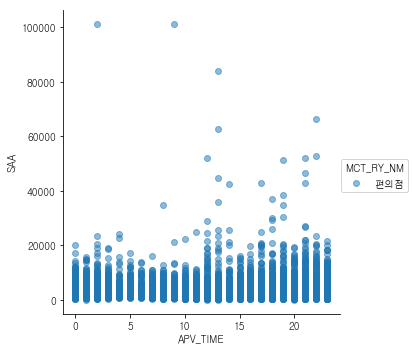

In [133]:
sns.FacetGrid(data_clean.loc[data_clean['MCT_RY_NM']=="편의점",:], hue="MCT_RY_NM",
              size=5).map(plt.scatter,"APV_TIME","SAA", alpha=0.5).add_legend()
plt.show()

#### 커피전문점 업종

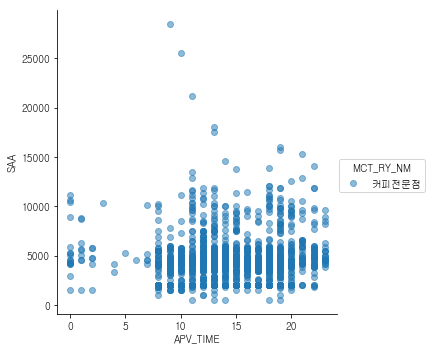

In [134]:
sns.FacetGrid(data_clean.loc[data_clean['MCT_RY_NM']=="커피전문점",:], hue="MCT_RY_NM",
              size=5).map(plt.scatter,"APV_TIME","SAA", alpha=0.5).add_legend()
plt.show()

#### TOP 5 업종

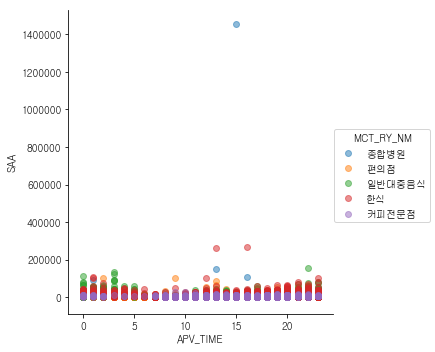

In [135]:
sns.FacetGrid(data_clean.loc[(data_clean['MCT_RY_NM']=="일반대중음식")|
                             (data_clean['MCT_RY_NM']=="한식")|
                             (data_clean['MCT_RY_NM']=="종합병원")|
                             (data_clean['MCT_RY_NM']=="편의점")|
                             (data_clean['MCT_RY_NM']=="커피전문점")
                             ,:], hue="MCT_RY_NM",
              size=5).map(plt.scatter, "APV_TIME", "SAA", alpha=0.5).add_legend()
plt.show()

### (9) 신용/체크카드 구분에 따른 분포

In [136]:
# 신용 정보 (0:체크, 1: 신용카드)
dataage_crd_tcd_0 = data_clean.loc[data_clean['CRD_TCD']== 0 , :]
dataage_crd_tcd_1 = data_clean.loc[data_clean['CRD_TCD']== 1 , :]

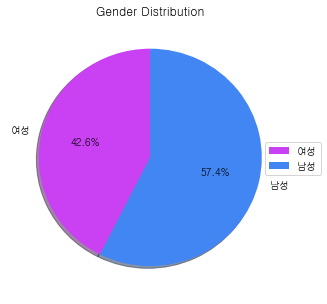

In [137]:
#체크 카드 쓰는 성비
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
female = dataage_crd_tcd_0[dataage_crd_tcd_0['SEX_CCD']==1]['CLNN'].count()
male = dataage_crd_tcd_0[dataage_crd_tcd_0['SEX_CCD']==0]['CLNN'].count()
list = [female,male]
label = ['여성','남성']
plt.subplots(figsize=(5,5))
pie=plt.pie(list,labels=label, colors=["#CA41f4", "#4286f4"],autopct='%1.1f%%',shadow=True, startangle=90)
# plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)
plt.legend(pie[0],label, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10,bbox_transform=
plt.gcf().transFigure)
plt.title("Gender Distribution")
plt.show()

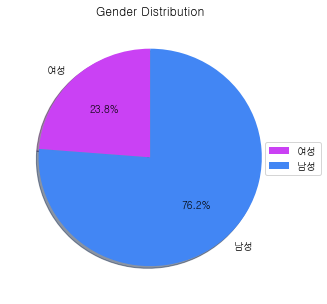

In [138]:
#신용카드 쓰는 성비
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
female = dataage_crd_tcd_1[dataage_crd_tcd_1['SEX_CCD']==1]['CLNN'].count()
male = dataage_crd_tcd_1[dataage_crd_tcd_1['SEX_CCD']==0]['CLNN'].count()
list = [female,male]
label = ['여성','남성']
plt.subplots(figsize=(5,5))
pie=plt.pie(list,labels=label, colors=["#CA41f4", "#4286f4"],autopct='%1.1f%%',shadow=True, startangle=90)
# plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)
plt.legend(pie[0],label, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10,bbox_transform=
plt.gcf().transFigure)
plt.title("Gender Distribution")
plt.show()

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32100 entries, 0 to 32099
Data columns (total 14 columns):
CLNN               32100 non-null object
CLN_AGE            32100 non-null int64
SEX_CCD            32100 non-null float64
MCT_N              32100 non-null object
MCT_RY_CD          32100 non-null int64
MCT_RY_NM          32100 non-null object
LAL_MCT_XC_VL      32100 non-null float64
LAL_MCT_YC_VL      32100 non-null float64
APV_TS_D           32100 non-null object
APV_TS_DL_TM       32100 non-null object
CRD_TCD            32100 non-null int64
NS_MS_CN           32100 non-null int64
SAA                32100 non-null int64
APV_TS_DATETIME    32100 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(5), object(5)
memory usage: 3.4+ MB


### (9) Heatmap

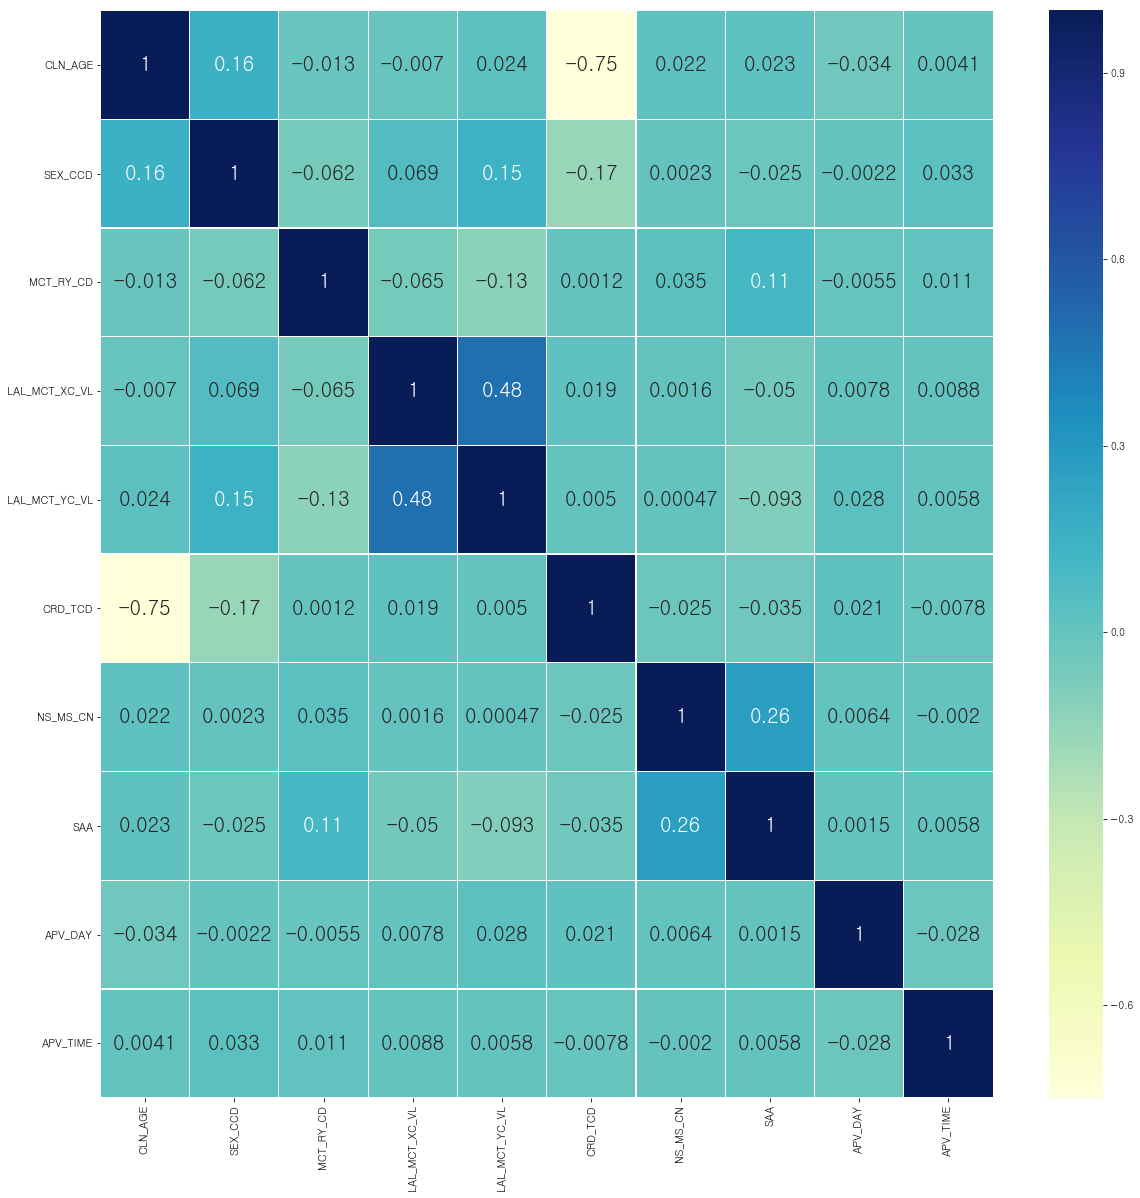

In [140]:
# 전체 변수 correlation 분석
corr = data_clean.corr()
sns.heatmap(corr,annot=True,cmap='YlGnBu',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

### (10) 가맹점 좌표 데이터 지도에 찍어보기

In [141]:

import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns
import folium
import sys



""" 데이터 불러오기 """
# 윈도우 환경에서 파일을 그대로 읽으면 유니코드 에러 발생, encoding을 CP949로 강제 지정해준다
df = pd.read_csv('Input/dfe_mct_data_set.csv',encoding='CP949')
## data = pd.read_csv('../Input/creditcard.csv',header=None)

""" 연령코드 생성 """
df["AGE_CCD"] =  df["CLN_AGE"] // 10 * 10 
df["SAA(10K)"] =  df["SAA"] / 10000 




""" 좌표값 셋팅을 위한 빈리스트 선언 """
lattitude2=[]
longitude2=[]

""" X좌표 Y좌표 값만 셋팅(건수컬럼삭제) """
lattitude1=df.groupby(["LAL_MCT_XC_VL"]).size().reset_index(name="건수")
del lattitude1["건수"]
longitude1=df.groupby(["LAL_MCT_YC_VL"]).size().reset_index(name="건수")
del longitude1["건수"]

lattitude2=lattitude1["LAL_MCT_XC_VL"].values
longitude2=longitude1["LAL_MCT_YC_VL"].values


""" 하나의 데이터프레임으로 X,Y좌표값 합치기 """
lattitude3=df.groupby(["LAL_MCT_XC_VL","LAL_MCT_YC_VL"]).size().reset_index(name="건수")
del lattitude3["건수"]

lattitude3.info()

"""  X,Y좌표값 컬럼값변환 """
lattitude3.columns=["X","Y"]


""" 고대안암병원 좌표 셋팅 """
KU = [37.58721205, 127.0270194]

""" 가맹점 좌표 갯수만큼만  """
MAX_RECORDS = lattitude3["X"].count()
"""print(lattitude3[0:MAX_RECORDS].iterrows())"""
# create empty map zoomed in on San Francisco

map_osm = folium.Map(location=KU, zoom_start=16)

# add a marker for every record in the filtered data, use a clustered view

for each in lattitude3[0:MAX_RECORDS].iterrows():
    folium.Marker(location = [each[1]['Y'],each[1]['X']],popup='address').add_to(map_osm)
  
map_osm


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 2 columns):
LAL_MCT_XC_VL    351 non-null float64
LAL_MCT_YC_VL    351 non-null float64
dtypes: float64(2)
memory usage: 5.6 KB


In [142]:
# 가맹점만 추출
data_clean.head()

,CLNN,CLN_AGE,SEX_CCD,MCT_N,MCT_RY_CD,MCT_RY_NM,LAL_MCT_XC_VL,LAL_MCT_YC_VL,APV_TS_D,APV_TS_DL_TM,CRD_TCD,NS_MS_CN,SAA,APV_TS_DATETIME,APV_DAY,APV_WEEK,APV_TIME
0,AA301810473,47,0.0,MM338736705,811000,종합병원,127.027019,37.587212,20171010,131835,0,0,400,2017-10-10 13:18:35,10,Tuesday,13
1,AA301810473,47,0.0,MM270435483,215000,편의점,127.027019,37.587212,20171024,143102,0,0,700,2017-10-24 14:31:02,24,Tuesday,14
2,AA301810473,47,0.0,MM338736705,811000,종합병원,127.027019,37.587212,20171010,122455,0,0,900,2017-10-10 12:24:55,10,Tuesday,12
3,AA301810473,47,0.0,MM338736705,811000,종합병원,127.027019,37.587212,20171025,151038,0,0,900,2017-10-25 15:10:38,25,Wednesday,15
4,AA301810473,47,0.0,MM338736705,811000,종합병원,127.027019,37.587212,20171025,151732,0,0,1000,2017-10-25 15:17:32,25,Wednesday,15


In [143]:
data_clean['MCT_N'].head()

0    MM338736705
1    MM270435483
2    MM338736705
3    MM338736705
4    MM338736705
Name: MCT_N, dtype: object

#### 원활한 matrix 생성을 위해 아예 excel에 cleansing한 데이터를 부어서 아래 작업은 필요가 없어짐
#### markdown으로 지워버림

In [144]:
# 중복 제거한 가맹점의 총 건수
# len(data_clean['MCT_N'].unique().tolist())


In [145]:
#tmp=data_clean.groupby(by = ['MCT_N'], as_index=False)
#'CLNN'].count()
# 가맹점별 거래건수를 센 뒤, 5건 이상의 거래가 발생한 가맹점만 추출한다
# merchant = data_clean.groupby('MCT_N').size()
# target_merchant = merchant.index[merchant>=10]

In [146]:
# 5건 이상의 거래가 발생한 가맹점수 : 678개
# len(target_merchant)

In [147]:
# print(target_merchant)

In [148]:
# 고객별 거래건수를 센 뒤, 50건 이상의 거래를 한 고객만 추출한다
# user = data_clean.groupby('CLNN').size()
# print(type(user))
# target_user = user.index[user>=50]

In [149]:
#  5건 이상의 거래를 한 고객 : 480명
# len(target_user)

In [150]:
# print(type(target_user))
# print(target_user)

In [151]:
## item간 유사도 계산을 위해서 가맹점별로 고객이 매출이 있었을 경우 1, 없었을 경우 0으로 세팅

In [152]:
data_clean.head()

,CLNN,CLN_AGE,SEX_CCD,MCT_N,MCT_RY_CD,MCT_RY_NM,LAL_MCT_XC_VL,LAL_MCT_YC_VL,APV_TS_D,APV_TS_DL_TM,CRD_TCD,NS_MS_CN,SAA,APV_TS_DATETIME,APV_DAY,APV_WEEK,APV_TIME
0,AA301810473,47,0.0,MM338736705,811000,종합병원,127.027019,37.587212,20171010,131835,0,0,400,2017-10-10 13:18:35,10,Tuesday,13
1,AA301810473,47,0.0,MM270435483,215000,편의점,127.027019,37.587212,20171024,143102,0,0,700,2017-10-24 14:31:02,24,Tuesday,14
2,AA301810473,47,0.0,MM338736705,811000,종합병원,127.027019,37.587212,20171010,122455,0,0,900,2017-10-10 12:24:55,10,Tuesday,12
3,AA301810473,47,0.0,MM338736705,811000,종합병원,127.027019,37.587212,20171025,151038,0,0,900,2017-10-25 15:10:38,25,Wednesday,15
4,AA301810473,47,0.0,MM338736705,811000,종합병원,127.027019,37.587212,20171025,151732,0,0,1000,2017-10-25 15:17:32,25,Wednesday,15


In [153]:
df = pd.DataFrame(data_clean, columns=["CLNN","MCT_N"])
df.head()

,CLNN,MCT_N
0,AA301810473,MM338736705
1,AA301810473,MM270435483
2,AA301810473,MM338736705
3,AA301810473,MM338736705
4,AA301810473,MM338736705


##### 총 타겟 고객 수

In [154]:
len(df.groupby(['CLNN']).size())

481

#### 총 타겟 가맹점 수

In [155]:
len(df.groupby(['MCT_N']).size())

586

#### 고객별, 가맹점별, 거래건수(승인건수)

In [156]:
df_target=df.groupby(['CLNN','MCT_N']).size().reset_index(name='COUNT')

In [157]:
df_target.head()

,CLNN,MCT_N,COUNT
0,AA100785899,MM112740470,3
1,AA100785899,MM113412910,1
2,AA100785899,MM123788374,1
3,AA100785899,MM131390076,2
4,AA100785899,MM139120988,1


In [158]:
min_count = df_target['COUNT'].min()
max_count = df_target['COUNT'].max()

print('카드 사용 건수 Min-Max Range: {0} to {1}'.format(min_count,max_count))

카드 사용 건수 Min-Max Range: 1 to 104


In [159]:
# matrix=df_target.set_index(["CLNN","MCT_N"]).unstack()

In [160]:
# Reshaping Data by Pivoting
# pd.pivot_table(data, index, columns, values, aggfunc) : 행을 index에, 열을 column에, 행과 열이 교차하는 위치에 values를 배치
piv = df_target.pivot_table(index=["CLNN"], columns=["MCT_N"], values='COUNT')

In [161]:
print(piv.shape)
piv.head()

(481, 586)


MCT_N,MM100304251,MM100501203,MM101419738,MM102514696,MM102618700,MM102756009,MM103944194,MM103977468,MM104356175,MM104447790,MM104495854,MM104542308,MM104958130,MM106164666,MM106924108,MM107781731,MM109556178,MM109609662,MM109647497,MM110819546,MM111752120,MM111813427,MM111858580,MM112238958,MM112401875,MM112468520,MM112740470,MM113412910,MM114652695,MM116162233,MM116651114,MM117470855,MM117833767,MM118109472,MM118413402,MM118901937,MM119173834,MM119448442,MM119518945,MM120180722,MM120313391,MM121502792,MM121752316,MM123788374,MM124095846,MM124662288,MM125668188,MM127623004,MM127847354,MM128003953,MM128468882,MM129024244,MM129195427,MM129408564,MM129988719,MM130049266,MM131379790,MM131390076,MM131861223,MM133057033,MM133452850,MM133717627,MM138383317,MM139120988,MM139206634,MM140121080,MM140434257,MM143255884,MM145457131,MM145517677,MM145808918,MM145835319,MM146035718,MM146260982,MM146460583,MM148139807,MM148289673,MM148441396,MM148633734,MM149018871,MM149254991,MM152180802,MM157281549,MM159671877,MM160680886,MM160828371,MM162143990,MM162803060,MM163193158,MM163906750,MM164264942,MM165136834,MM165715930,MM165801692,MM166516588,MM166531010,MM168038670,MM169882351,MM170363265,MM170669132,MM172636249,MM173263754,MM173616585,MM174555162,MM174776788,MM174996215,MM175929283,MM176068460,MM177315652,MM178177212,MM180256049,MM181460554,MM182080957,MM182769859,MM184047766,MM184674756,MM185291637,MM186612958,MM188326682,MM188826198,MM188970171,MM189808798,MM191555407,MM192177280,MM195203627,MM195487656,MM195766146,MM196058377,MM196771752,MM197652500,MM198638165,MM198730037,MM199542537,MM200114334,MM201777311,MM201850871,MM201870971,MM201892490,MM202823918,MM203022359,MM203595217,MM203706705,MM203789039,MM205593798,MM205833854,MM205992474,MM206446288,MM206504885,MM206612423,MM206783250,MM207520213,MM208200001,MM209606941,MM209727200,MM210555194,MM210566230,MM210654631,MM211070906,MM211355645,MM211401258,MM211796557,MM211871523,MM212775992,MM213004332,MM213558413,MM214521590,MM214714787,MM215005255,MM215365285,MM215787940,MM215928144,MM215968887,MM217878935,MM218579474,MM219759562,MM220933871,MM221009043,MM222018477,MM222996993,MM223662858,MM226094222,MM227919844,MM228242024,MM229945474,MM232036078,MM232402162,MM233061796,MM234391961,MM235555521,MM235586402,MM235620403,MM235657475,MM235869704,MM237882667,MM238372271,MM238430019,MM239079932,MM239228063,MM239896592,MM239896694,MM240481531,MM240866096,MM241615375,MM241664286,MM241708247,MM242239458,MM242703443,MM243248786,MM243613632,MM243806393,MM244126263,MM244491856,MM245261019,MM245440959,MM245608526,MM247783475,MM247912326,MM249079687,MM249174840,MM249282367,MM250674915,MM251650361,MM251779892,MM252567090,MM253065818,MM253519581,MM253811089,MM255014816,MM255019197,MM256337811,MM256389614,MM256612554,MM257094967,MM259548037,MM260062972,MM260275574,MM261557105,MM261608270,MM262096389,MM264149808,MM264593376,MM265103127,MM265988916,MM266432683,MM267342472,MM267873098,MM268800600,MM268879334,MM268927531,MM268979580,MM269072816,MM269270559,MM269512425,MM270435483,MM271386368,MM271844064,MM272285373,MM272756217,MM273621995,MM274165486,MM274516511,MM276005103,MM276154771,MM276390827,MM276490159,MM276792704,MM277405552,MM278439464,MM279758274,MM280986994,MM281840366,MM282054078,MM282398568,MM283679640,MM284223947,MM285666746,MM286714196,MM287009898,MM287767080,MM288908113,MM289472690,MM291351257,MM292355960,MM293080230,MM293971730,MM294512687,MM294611232,MM295066336,MM296724561,MM297110266,MM297912332,MM298060756,MM298846611,MM299460440,MM299553412,MM299740675,MM301315154,MM301361194,MM301817386,MM303073471,MM303845063,MM304224289,MM304708855,MM304918245,MM305062756,MM305770237,MM305890402,MM306437073,MM306878709,MM307161920,MM307365604,MM308022472,MM308244130,MM308740682,MM310574443,MM310881556,MM311898424,MM311993882,MM312281141,MM313435002,MM315017536,MM316531680,MM317905131,MM317953587,MM318265451,MM321009265,MM323093255,MM323441761,MM323489022,MM323690830,MM324143000,MM325014696,MM32505642

In [162]:
# piv.iloc[0:20,0:20].fillna(0)

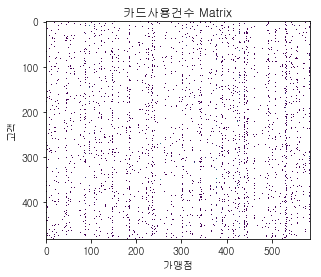

In [163]:
plt.imshow(piv)
plt.grid(False)
plt.xlabel("가맹점")
plt.ylabel("고객")
plt.title("카드사용건수 Matrix")
plt.show()

In [164]:
# Mean Normalization

# python에서 mean 계산시 결측값(NaN)은 제외하고 계산한다
# apply 함수: axis 옵션을 주지 않으면 columns 단위로 apply 적용 / axis=1 옵션을 주면 row 단위로 적용
piv_norm = piv.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)

In [165]:
piv_norm.head()

MCT_N,MM100304251,MM100501203,MM101419738,MM102514696,MM102618700,MM102756009,MM103944194,MM103977468,MM104356175,MM104447790,MM104495854,MM104542308,MM104958130,MM106164666,MM106924108,MM107781731,MM109556178,MM109609662,MM109647497,MM110819546,MM111752120,MM111813427,MM111858580,MM112238958,MM112401875,MM112468520,MM112740470,MM113412910,MM114652695,MM116162233,MM116651114,MM117470855,MM117833767,MM118109472,MM118413402,MM118901937,MM119173834,MM119448442,MM119518945,MM120180722,MM120313391,MM121502792,MM121752316,MM123788374,MM124095846,MM124662288,MM125668188,MM127623004,MM127847354,MM128003953,MM128468882,MM129024244,MM129195427,MM129408564,MM129988719,MM130049266,MM131379790,MM131390076,MM131861223,MM133057033,MM133452850,MM133717627,MM138383317,MM139120988,MM139206634,MM140121080,MM140434257,MM143255884,MM145457131,MM145517677,MM145808918,MM145835319,MM146035718,MM146260982,MM146460583,MM148139807,MM148289673,MM148441396,MM148633734,MM149018871,MM149254991,MM152180802,MM157281549,MM159671877,MM160680886,MM160828371,MM162143990,MM162803060,MM163193158,MM163906750,MM164264942,MM165136834,MM165715930,MM165801692,MM166516588,MM166531010,MM168038670,MM169882351,MM170363265,MM170669132,MM172636249,MM173263754,MM173616585,MM174555162,MM174776788,MM174996215,MM175929283,MM176068460,MM177315652,MM178177212,MM180256049,MM181460554,MM182080957,MM182769859,MM184047766,MM184674756,MM185291637,MM186612958,MM188326682,MM188826198,MM188970171,MM189808798,MM191555407,MM192177280,MM195203627,MM195487656,MM195766146,MM196058377,MM196771752,MM197652500,MM198638165,MM198730037,MM199542537,MM200114334,MM201777311,MM201850871,MM201870971,MM201892490,MM202823918,MM203022359,MM203595217,MM203706705,MM203789039,MM205593798,MM205833854,MM205992474,MM206446288,MM206504885,MM206612423,MM206783250,MM207520213,MM208200001,MM209606941,MM209727200,MM210555194,MM210566230,MM210654631,MM211070906,MM211355645,MM211401258,MM211796557,MM211871523,MM212775992,MM213004332,MM213558413,MM214521590,MM214714787,MM215005255,MM215365285,MM215787940,MM215928144,MM215968887,MM217878935,MM218579474,MM219759562,MM220933871,MM221009043,MM222018477,MM222996993,MM223662858,MM226094222,MM227919844,MM228242024,MM229945474,MM232036078,MM232402162,MM233061796,MM234391961,MM235555521,MM235586402,MM235620403,MM235657475,MM235869704,MM237882667,MM238372271,MM238430019,MM239079932,MM239228063,MM239896592,MM239896694,MM240481531,MM240866096,MM241615375,MM241664286,MM241708247,MM242239458,MM242703443,MM243248786,MM243613632,MM243806393,MM244126263,MM244491856,MM245261019,MM245440959,MM245608526,MM247783475,MM247912326,MM249079687,MM249174840,MM249282367,MM250674915,MM251650361,MM251779892,MM252567090,MM253065818,MM253519581,MM253811089,MM255014816,MM255019197,MM256337811,MM256389614,MM256612554,MM257094967,MM259548037,MM260062972,MM260275574,MM261557105,MM261608270,MM262096389,MM264149808,MM264593376,MM265103127,MM265988916,MM266432683,MM267342472,MM267873098,MM268800600,MM268879334,MM268927531,MM268979580,MM269072816,MM269270559,MM269512425,MM270435483,MM271386368,MM271844064,MM272285373,MM272756217,MM273621995,MM274165486,MM274516511,MM276005103,MM276154771,MM276390827,MM276490159,MM276792704,MM277405552,MM278439464,MM279758274,MM280986994,MM281840366,MM282054078,MM282398568,MM283679640,MM284223947,MM285666746,MM286714196,MM287009898,MM287767080,MM288908113,MM289472690,MM291351257,MM292355960,MM293080230,MM293971730,MM294512687,MM294611232,MM295066336,MM296724561,MM297110266,MM297912332,MM298060756,MM298846611,MM299460440,MM299553412,MM299740675,MM301315154,MM301361194,MM301817386,MM303073471,MM303845063,MM304224289,MM304708855,MM304918245,MM305062756,MM305770237,MM305890402,MM306437073,MM306878709,MM307161920,MM307365604,MM308022472,MM308244130,MM308740682,MM310574443,MM310881556,MM311898424,MM311993882,MM312281141,MM313435002,MM315017536,MM316531680,MM317905131,MM317953587,MM318265451,MM321009265,MM323093255,MM323441761,MM323489022,MM323690830,MM324143000,MM325014696,MM32505642

In [166]:
# matrix_norm.iloc[0:20,0:20].fillna(0)
# piv = piv_norm

In [167]:
# 결측값(missing values - 고객이 해당 가맹점을 이용하지 않은 경우)에 대해 0으로 채운다
piv_norm.fillna(0, inplace=True)

# 행과 열을 전치
piv_output = piv_norm.T
piv_output.head()

CLNN,AA100785899,AA101428433,AA101583171,AA101625298,AA102422105,AA103613612,AA104372726,AA104405516,AA105941020,AA106045767,AA108202640,AA108419200,AA110186582,AA110567414,AA112280439,AA112333826,AA112652485,AA112675160,AA113153122,AA113355529,AA115290035,AA115988092,AA116546276,AA118304014,AA118444142,AA119751846,AA120542615,AA121126298,AA122311534,AA123861656,AA126840413,AA127706310,AA127912188,AA128111079,AA130039718,AA130153937,AA131274986,AA131531918,AA132074012,AA132584893,AA133271753,AA133357324,AA133741420,AA134153504,AA134605807,AA134725195,AA135157125,AA136518307,AA138134712,AA139520998,AA141248535,AA142116449,AA142453611,AA142671989,AA143073629,AA143249230,AA143484300,AA143487069,AA143780308,AA144284344,AA144456292,AA144928895,AA145629703,AA148788059,AA149985904,AA150479490,AA153070031,AA153079058,AA153757246,AA155472162,AA157215125,AA157409016,AA159153930,AA159453789,AA159513636,AA160368747,AA160615092,AA160661767,AA160747885,AA160938104,AA161031545,AA161388372,AA163824291,AA164867566,AA165398427,AA167402292,AA167615219,AA169591384,AA169976486,AA170837347,AA171126956,AA171406226,AA171429473,AA172454777,AA172621551,AA174400753,AA174461764,AA174743473,AA175536721,AA175796980,AA176130958,AA176998639,AA177077719,AA177244361,AA178638993,AA178841151,AA178934770,AA181652464,AA183588049,AA184202999,AA185892372,AA185993700,AA186109101,AA186736822,AA187888357,AA188046844,AA189001643,AA189141763,AA189312856,AA189941969,AA190793673,AA190827714,AA191401329,AA191547610,AA193638426,AA193697634,AA194185859,AA194737739,AA195069620,AA197682842,AA198739346,AA198782693,AA200928651,AA202422031,AA203606803,AA203695857,AA203747809,AA205245583,AA205700469,AA206537662,AA206556927,AA207416407,AA210343980,AA210385780,AA211491273,AA211494564,AA211511841,AA211604710,AA211712094,AA212130956,AA215231392,AA216389960,AA217035952,AA217051620,AA217074834,AA217512873,AA218492622,AA218710387,AA219283689,AA219623351,AA220151927,AA221291721,AA221292390,AA223739992,AA224729710,AA224877999,AA226052717,AA226083793,AA226409547,AA226453425,AA226692139,AA226831954,AA227082470,AA230417597,AA230839709,AA233862957,AA233976560,AA234367959,AA234377984,AA234608561,AA234758819,AA234992770,AA235293259,AA236083377,AA236733523,AA236894326,AA238953510,AA241456406,AA242081330,AA242691556,AA242708292,AA242851761,AA243629831,AA244450256,AA244720509,AA245376796,AA247920268,AA248813953,AA251271631,AA251302501,AA252284265,AA252325635,AA253037930,AA253125549,AA254371313,AA255605226,AA256766428,AA257461893,AA258324255,AA258336487,AA259985670,AA260264887,AA260594047,AA261308291,AA261393867,AA261567837,AA262590946,AA263929108,AA265391241,AA265438028,AA265784361,AA266231519,AA266718482,AA267280875,AA267823869,AA270944921,AA271477203,AA271966357,AA272669498,AA273085122,AA274778151,AA275020825,AA276679165,AA277033650,AA277105194,AA277977916,AA279593384,AA281360150,AA281721969,AA282421288,AA282725209,AA285075810,AA285951502,AA286608735,AA287191210,AA287806479,AA287981519,AA288548757,AA288560882,AA290378668,AA291671982,AA291773784,AA292237334,AA292453149,AA292779787,AA293179499,AA293928073,AA297653422,AA297995709,AA301026177,AA301595808,AA301717077,AA301810473,AA302604282,AA302758532,AA304994327,AA306543234,AA307248605,AA308480371,AA308622544,AA309663798,AA309910180,AA310776616,AA311252662,AA311939770,AA312290785,AA312635709,AA313491991,AA316092126,AA317649923,AA317673738,AA317752587,AA319916419,AA321053148,AA321210150,AA322205725,AA322729920,AA326439280,AA326895554,AA327000074,AA327205979,AA327378065,AA331344793,AA331435583,AA332647953,AA332833500,AA332873711,AA333185041,AA333801429,AA334018143,AA334739549,AA336676957,AA337219539,AA338030391,AA339229345,AA339247301,AA339944664,AA340068211,AA341101972,AA341479847,AA341648448,AA341781338,AA342093052,AA342746851,AA344781423,AA344844805,AA345808321,AA347138054,AA347833761,AA347852603,AA348563971,AA348736020,AA348882997,AA351698220,AA352060016,AA354702704,AA356712101,AA356854434,AA357116701,AA357906537,AA358433923,AA359412670,AA360332520

In [168]:
import scipy as sp
from sklearn.metrics.pairwise import cosine_similarity

In [169]:
matrix_sparse = sp.sparse.csr_matrix(piv_output.values)

In [170]:
# print(matrix_sparse)

In [171]:
item_similarity = cosine_similarity(matrix_sparse)
user_similarity = cosine_similarity(matrix_sparse.T)

In [172]:
# Inserting the similarity matricies into dataframe objects

item_sim_df = pd.DataFrame(item_similarity, index = piv_output.index, columns = piv_output.index)
user_sim_df = pd.DataFrame(user_similarity, index = piv_output.columns, columns = piv_output.columns)

In [173]:
item_sim_df.head()

MCT_N,MM100304251,MM100501203,MM101419738,MM102514696,MM102618700,MM102756009,MM103944194,MM103977468,MM104356175,MM104447790,MM104495854,MM104542308,MM104958130,MM106164666,MM106924108,MM107781731,MM109556178,MM109609662,MM109647497,MM110819546,MM111752120,MM111813427,MM111858580,MM112238958,MM112401875,MM112468520,MM112740470,MM113412910,MM114652695,MM116162233,MM116651114,MM117470855,MM117833767,MM118109472,MM118413402,MM118901937,MM119173834,MM119448442,MM119518945,MM120180722,MM120313391,MM121502792,MM121752316,MM123788374,MM124095846,MM124662288,MM125668188,MM127623004,MM127847354,MM128003953,MM128468882,MM129024244,MM129195427,MM129408564,MM129988719,MM130049266,MM131379790,MM131390076,MM131861223,MM133057033,MM133452850,MM133717627,MM138383317,MM139120988,MM139206634,MM140121080,MM140434257,MM143255884,MM145457131,MM145517677,MM145808918,MM145835319,MM146035718,MM146260982,MM146460583,MM148139807,MM148289673,MM148441396,MM148633734,MM149018871,MM149254991,MM152180802,MM157281549,MM159671877,MM160680886,MM160828371,MM162143990,MM162803060,MM163193158,MM163906750,MM164264942,MM165136834,MM165715930,MM165801692,MM166516588,MM166531010,MM168038670,MM169882351,MM170363265,MM170669132,MM172636249,MM173263754,MM173616585,MM174555162,MM174776788,MM174996215,MM175929283,MM176068460,MM177315652,MM178177212,MM180256049,MM181460554,MM182080957,MM182769859,MM184047766,MM184674756,MM185291637,MM186612958,MM188326682,MM188826198,MM188970171,MM189808798,MM191555407,MM192177280,MM195203627,MM195487656,MM195766146,MM196058377,MM196771752,MM197652500,MM198638165,MM198730037,MM199542537,MM200114334,MM201777311,MM201850871,MM201870971,MM201892490,MM202823918,MM203022359,MM203595217,MM203706705,MM203789039,MM205593798,MM205833854,MM205992474,MM206446288,MM206504885,MM206612423,MM206783250,MM207520213,MM208200001,MM209606941,MM209727200,MM210555194,MM210566230,MM210654631,MM211070906,MM211355645,MM211401258,MM211796557,MM211871523,MM212775992,MM213004332,MM213558413,MM214521590,MM214714787,MM215005255,MM215365285,MM215787940,MM215928144,MM215968887,MM217878935,MM218579474,MM219759562,MM220933871,MM221009043,MM222018477,MM222996993,MM223662858,MM226094222,MM227919844,MM228242024,MM229945474,MM232036078,MM232402162,MM233061796,MM234391961,MM235555521,MM235586402,MM235620403,MM235657475,MM235869704,MM237882667,MM238372271,MM238430019,MM239079932,MM239228063,MM239896592,MM239896694,MM240481531,MM240866096,MM241615375,MM241664286,MM241708247,MM242239458,MM242703443,MM243248786,MM243613632,MM243806393,MM244126263,MM244491856,MM245261019,MM245440959,MM245608526,MM247783475,MM247912326,MM249079687,MM249174840,MM249282367,MM250674915,MM251650361,MM251779892,MM252567090,MM253065818,MM253519581,MM253811089,MM255014816,MM255019197,MM256337811,MM256389614,MM256612554,MM257094967,MM259548037,MM260062972,MM260275574,MM261557105,MM261608270,MM262096389,MM264149808,MM264593376,MM265103127,MM265988916,MM266432683,MM267342472,MM267873098,MM268800600,MM268879334,MM268927531,MM268979580,MM269072816,MM269270559,MM269512425,MM270435483,MM271386368,MM271844064,MM272285373,MM272756217,MM273621995,MM274165486,MM274516511,MM276005103,MM276154771,MM276390827,MM276490159,MM276792704,MM277405552,MM278439464,MM279758274,MM280986994,MM281840366,MM282054078,MM282398568,MM283679640,MM284223947,MM285666746,MM286714196,MM287009898,MM287767080,MM288908113,MM289472690,MM291351257,MM292355960,MM293080230,MM293971730,MM294512687,MM294611232,MM295066336,MM296724561,MM297110266,MM297912332,MM298060756,MM298846611,MM299460440,MM299553412,MM299740675,MM301315154,MM301361194,MM301817386,MM303073471,MM303845063,MM304224289,MM304708855,MM304918245,MM305062756,MM305770237,MM305890402,MM306437073,MM306878709,MM307161920,MM307365604,MM308022472,MM308244130,MM308740682,MM310574443,MM310881556,MM311898424,MM311993882,MM312281141,MM313435002,MM315017536,MM316531680,MM317905131,MM317953587,MM318265451,MM321009265,MM323093255,MM323441761,MM323489022,MM323690830,MM324143000,MM325014696,MM32505642

In [174]:
user_sim_df.head()

CLNN,AA100785899,AA101428433,AA101583171,AA101625298,AA102422105,AA103613612,AA104372726,AA104405516,AA105941020,AA106045767,AA108202640,AA108419200,AA110186582,AA110567414,AA112280439,AA112333826,AA112652485,AA112675160,AA113153122,AA113355529,AA115290035,AA115988092,AA116546276,AA118304014,AA118444142,AA119751846,AA120542615,AA121126298,AA122311534,AA123861656,AA126840413,AA127706310,AA127912188,AA128111079,AA130039718,AA130153937,AA131274986,AA131531918,AA132074012,AA132584893,AA133271753,AA133357324,AA133741420,AA134153504,AA134605807,AA134725195,AA135157125,AA136518307,AA138134712,AA139520998,AA141248535,AA142116449,AA142453611,AA142671989,AA143073629,AA143249230,AA143484300,AA143487069,AA143780308,AA144284344,AA144456292,AA144928895,AA145629703,AA148788059,AA149985904,AA150479490,AA153070031,AA153079058,AA153757246,AA155472162,AA157215125,AA157409016,AA159153930,AA159453789,AA159513636,AA160368747,AA160615092,AA160661767,AA160747885,AA160938104,AA161031545,AA161388372,AA163824291,AA164867566,AA165398427,AA167402292,AA167615219,AA169591384,AA169976486,AA170837347,AA171126956,AA171406226,AA171429473,AA172454777,AA172621551,AA174400753,AA174461764,AA174743473,AA175536721,AA175796980,AA176130958,AA176998639,AA177077719,AA177244361,AA178638993,AA178841151,AA178934770,AA181652464,AA183588049,AA184202999,AA185892372,AA185993700,AA186109101,AA186736822,AA187888357,AA188046844,AA189001643,AA189141763,AA189312856,AA189941969,AA190793673,AA190827714,AA191401329,AA191547610,AA193638426,AA193697634,AA194185859,AA194737739,AA195069620,AA197682842,AA198739346,AA198782693,AA200928651,AA202422031,AA203606803,AA203695857,AA203747809,AA205245583,AA205700469,AA206537662,AA206556927,AA207416407,AA210343980,AA210385780,AA211491273,AA211494564,AA211511841,AA211604710,AA211712094,AA212130956,AA215231392,AA216389960,AA217035952,AA217051620,AA217074834,AA217512873,AA218492622,AA218710387,AA219283689,AA219623351,AA220151927,AA221291721,AA221292390,AA223739992,AA224729710,AA224877999,AA226052717,AA226083793,AA226409547,AA226453425,AA226692139,AA226831954,AA227082470,AA230417597,AA230839709,AA233862957,AA233976560,AA234367959,AA234377984,AA234608561,AA234758819,AA234992770,AA235293259,AA236083377,AA236733523,AA236894326,AA238953510,AA241456406,AA242081330,AA242691556,AA242708292,AA242851761,AA243629831,AA244450256,AA244720509,AA245376796,AA247920268,AA248813953,AA251271631,AA251302501,AA252284265,AA252325635,AA253037930,AA253125549,AA254371313,AA255605226,AA256766428,AA257461893,AA258324255,AA258336487,AA259985670,AA260264887,AA260594047,AA261308291,AA261393867,AA261567837,AA262590946,AA263929108,AA265391241,AA265438028,AA265784361,AA266231519,AA266718482,AA267280875,AA267823869,AA270944921,AA271477203,AA271966357,AA272669498,AA273085122,AA274778151,AA275020825,AA276679165,AA277033650,AA277105194,AA277977916,AA279593384,AA281360150,AA281721969,AA282421288,AA282725209,AA285075810,AA285951502,AA286608735,AA287191210,AA287806479,AA287981519,AA288548757,AA288560882,AA290378668,AA291671982,AA291773784,AA292237334,AA292453149,AA292779787,AA293179499,AA293928073,AA297653422,AA297995709,AA301026177,AA301595808,AA301717077,AA301810473,AA302604282,AA302758532,AA304994327,AA306543234,AA307248605,AA308480371,AA308622544,AA309663798,AA309910180,AA310776616,AA311252662,AA311939770,AA312290785,AA312635709,AA313491991,AA316092126,AA317649923,AA317673738,AA317752587,AA319916419,AA321053148,AA321210150,AA322205725,AA322729920,AA326439280,AA326895554,AA327000074,AA327205979,AA327378065,AA331344793,AA331435583,AA332647953,AA332833500,AA332873711,AA333185041,AA333801429,AA334018143,AA334739549,AA336676957,AA337219539,AA338030391,AA339229345,AA339247301,AA339944664,AA340068211,AA341101972,AA341479847,AA341648448,AA341781338,AA342093052,AA342746851,AA344781423,AA344844805,AA345808321,AA347138054,AA347833761,AA347852603,AA348563971,AA348736020,AA348882997,AA351698220,AA352060016,AA354702704,AA356712101,AA356854434,AA357116701,AA357906537,AA358433923,AA359412670,AA360332520

In [175]:
piv_output.info()

<class 'pandas.core.frame.DataFrame'>
Index: 586 entries, MM100304251 to MM976336783
Columns: 481 entries, AA100785899 to AA995982217
dtypes: float64(481)
memory usage: 2.2+ MB


In [176]:
# item_sim_df.sort_values(by = ['MM100304251'], ascending = False)

In [177]:
# target 가맹점 기준 가장 cosine similarity value가 높은 10개의 가맹점을 추출

def get_similar_item(merchant_name):
    if merchant_name not in piv_output.index:
        return('No data available on merchant {}'.format(merchant_name))
    
    sim_values = item_sim_df.sort_values(by=merchant_name, ascending=False).loc[:,merchant_name].tolist()[1:11]
    sim_merchants = item_sim_df.sort_values(by=merchant_name, ascending=False).index[1:11]
    return sim_merchants, sim_values

In [178]:
# 가장 cosine similarity value가 높은 10명의 고객을 보여준다

def get_similar_user(user):
    if user not in piv_output.columns:
        return('No data available on user {}'.format(user))    

    sim_values = user_sim_df.sort_values(by=user, ascending=False).loc[:,user].tolist()[1:11]
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:11]
    return sim_users, sim_values

In [179]:
# This function calculates the weighted average of similar users to determine a potential uses for an input user and merchant
# 가맹점 x를 고객 y가 방문하여 몇 회 정도 카드를 이용할지 추측

def predicted_use(merchant_name, user):
    # 유사도가 높은 top 1000건을 추출
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:1000]
    user_values = user_sim_df.sort_values(by=user, ascending=False).loc[:,user].tolist()[1:1000]
    
    counting_list = []
    weight_list = []
    for j, i in enumerate(sim_users):
        # piv : normalization 전의 matrix
        # (similarity가 높은) 유저가 타겟 가맹점에서 카드를 이용한 횟수
        counting = piv.loc[i, merchant_name]
        similarity = user_values[j]
        if np.isnan(counting):
            continue
        elif not np.isnan(counting):
            # counting list : 타겟 고객과 유사도가 높은 고객들의 (카드 이용한 건수 * similarity값)
            counting_list.append(counting*similarity)
            # weight_list : 해당 고객의 similiarity
            weight_list.append(similarity)
    # print("merchant_name", merchant_name, "user", user)
    # print("sum:", sum(counting_list))
    # print("sum:", sum(weight_list))
    
    return sum(counting_list)/sum(weight_list) 

### 1. 가맹점 간 유사도(item-item similarity) 계산에 의해 임의의 가맹점과 유사도가 높은 top 10 가맹점을 찾아본다

In [180]:
target_merchant='MM100304251'

print('가맹점번호 {}와 유사한 가맹점 Top 10:\n'.format(target_merchant))

sim_merchants, sim_scores = get_similar_item(target_merchant)
zipped = zip(sim_merchants, sim_scores,)
for merchant_name, sim in zipped:
    print('가맹점 #{0}, Similarity Score: {1:.2f}'.format(merchant_name, sim))

가맹점번호 MM100304251와 유사한 가맹점 Top 10:

가맹점 #MM299460440, Similarity Score: 0.41
가맹점 #MM570336383, Similarity Score: 0.39
가맹점 #MM862657741, Similarity Score: 0.28
가맹점 #MM250674915, Similarity Score: 0.17
가맹점 #MM232036078, Similarity Score: 0.15
가맹점 #MM255014816, Similarity Score: 0.15
가맹점 #MM323489022, Similarity Score: 0.13
가맹점 #MM382034025, Similarity Score: 0.13
가맹점 #MM148289673, Similarity Score: 0.13
가맹점 #MM323093255, Similarity Score: 0.12


### 2. 고객 간 유사도(user-user similarity) 계산에 의해 임의의 고객과 유사도가 높은 top 10 고객을 찾아본다

In [181]:
target_user='AA101428433'

print('고객 {}과 유사한 고객 Top 10:\n'.format(target_user))

sim_users, sim_scores = get_similar_user(target_user)
zipped = zip(sim_users, sim_scores,)
for user, sim in zipped:
    print('고객 #{0}, Similarity Score: {1:.2f}'.format(user, sim)) 

고객 AA101428433과 유사한 고객 Top 10:

고객 #AA398502308, Similarity Score: 0.55
고객 #AA587240379, Similarity Score: 0.46
고객 #AA165398427, Similarity Score: 0.44
고객 #AA641842114, Similarity Score: 0.43
고객 #AA356854434, Similarity Score: 0.42
고객 #AA226831954, Similarity Score: 0.42
고객 #AA297995709, Similarity Score: 0.41
고객 #AA259985670, Similarity Score: 0.41
고객 #AA157215125, Similarity Score: 0.40
고객 #AA370046461, Similarity Score: 0.40


#### 유사도가 매우 높게 나오는 경우도 있다

In [182]:
target_user='AA273085122'

print('고객 {}과 유사한 고객 Top 10:\n'.format(target_user))

sim_users, sim_scores = get_similar_user(target_user)
zipped = zip(sim_users, sim_scores,)
for user, sim in zipped:
    print('고객 #{0}, Similarity Score: {1:.2f}'.format(user, sim)) 

고객 AA273085122과 유사한 고객 Top 10:

고객 #AA548766544, Similarity Score: 0.92
고객 #AA316092126, Similarity Score: 0.91
고객 #AA297653422, Similarity Score: 0.91
고객 #AA211604710, Similarity Score: 0.89
고객 #AA175536721, Similarity Score: 0.89
고객 #AA386559601, Similarity Score: 0.88
고객 #AA313491991, Similarity Score: 0.87
고객 #AA708496169, Similarity Score: 0.87
고객 #AA219283689, Similarity Score: 0.87
고객 #AA882845049, Similarity Score: 0.85


#### 가맹점 간 유사도보다는, 고객간 유사도를 계산했을 때 더 유사도가 높게 나오는 경향이 있는 것으로 보인다

In [183]:
# target 고객이, target 가맹점에서 카드를 몇 번이나 이용할지 예측해보기
# 예측 function은 직접 설계해야 함 (이 부분에서 한계)

target_item='MM346843093'
target_user='AA236083377'
predicted_use(target_item, target_user)

7.6945033718698

In [184]:
# 예측값과 실측값 간의 squared error 계산

# 실제 거래가 있던 경우를 토대로 
#target_item='MM270435483'
#target_user='AA236083377'
#print("predicted score:" , predicted_use('MM346843093', 'AA236083377'))

cardused = piv.T[piv.loc[target_user][:]>0].index.tolist()
print(cardused)

errors = []
for i in cardused:
    actual=piv.loc[target_user][:]
    # print(actual)
    predicted = predicted_use(i, target_user)
    # print(predicted)
    errors.append((actual-predicted)**2)
    # print(errors)

['MM114652695', 'MM121752316', 'MM131390076', 'MM133057033', 'MM214521590', 'MM264149808', 'MM299740675', 'MM323690830', 'MM346843093', 'MM349751143', 'MM359124596', 'MM371539338', 'MM372644261', 'MM374684974', 'MM380793857', 'MM381304897', 'MM384740521', 'MM386243792', 'MM395245911', 'MM446776649', 'MM466006745', 'MM503079425', 'MM658711562', 'MM716144171', 'MM753521950', 'MM976336783']


ZeroDivisionError: division by zero

In [ ]:
np.mean(errors)

In [ ]:
import numpy as np

# recommend top n_anime for user x based on item collaborative filtering algorithm
def get_recommendation(user_id, n_anime=10):
    predicted_use = np.array([])
    #print(predicted_use)
    
    for _anime in piv_output.index:
        #predicted_use.append(user_id, _anime)
        predicted_use = np.append(predicted_use, predicted_use(_anime, user_id))
    
    # don't recommend something that user has already rated
    temp = pd.DataFrame({'predicted':predicted_use, 'name':piv_output.index})
    filtering = (piv_output[user_id] == 0.0)
    temp = temp.loc[filtering.values].sort_values(by='predicted', ascending=False)

    # recommend n_anime anime
    return anime.loc[anime_index.loc[temp.name[:n_anime]]]

In [ ]:
# This function constructs a list of lists containing the highest rated shows per similar user
# and returns the name of the show along with the frequency it appears in the list

import operator

def similar_client_recs(user):
    
    if user not in piv_output.columns:
        return('No data available on user {}'.format(user))
    
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:11]
    best = []
    most_common = {}
    
    for i in sim_users:
        max_score = piv_output.loc[:, i].max()
        print(max_score)
        best.append(piv_output[piv_output.loc[:, i]==max_score].index.tolist())
    for i in range(len(best)):
        for j in best[i]:
            if j in most_common:
                most_common[j] += 1
            else:
                most_common[j] = 1
    sorted_list = sorted(most_common.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_list[:10]    

In [ ]:
similar_client_recs('AA273085122')